In [18]:
import sklearn as s
help(s)
# then dir()

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime

In [19]:
import pandas as pd
df = pd.read_csv("01 Data.csv")
df.head()

,area,class,size,color,bedrooms,price
0,1056,first,s,red,2.0000,39.07
1,2600,test,l,green,5.8775,120.00
2,1440,third,xl,blue,3.0000,62.00
3,1521,NaN,l,red,3.0000,75.00
4,1200,third,s,blue,NaN,51.00


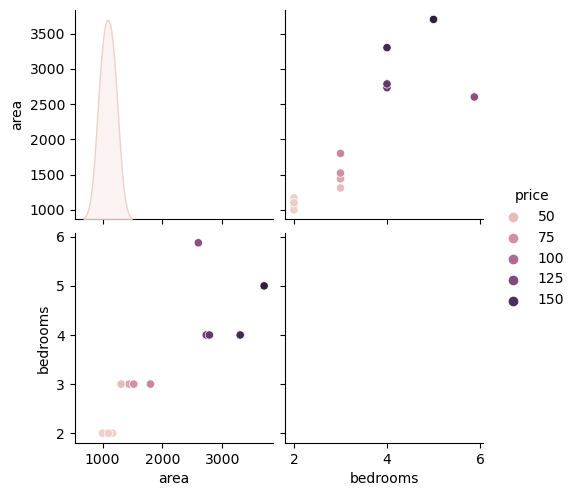

In [20]:
# Visualazation
import matplotlib.pyplot as plt
import seaborn as sb
# sb.pairplot(data=df[1:50]);
sb.pairplot(data=df, hue="price");

# save my image
plt.savefig("plot.png")

In [21]:
# finding unrelated cells and make them empty

import numpy as np

df=df.replace({
    "class": ["test"],
    "bedrooms": [5.8775],
},np.NaN, inplace=True)
df

In [22]:
# finding empty cells

df.isnull().sum()

AttributeError: 'NoneType' object has no attribute 'isnull'

In [23]:
# fill string columns
df["class"].mode()

TypeError: 'NoneType' object is not subscriptable

In [24]:
df = df.fillna({
    "class": 'third',
},inplace=True)
df

AttributeError: 'NoneType' object has no attribute 'fillna'

In [ ]:
# fill numerical columns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#df[['bedrooms']] = IterativeImputer().fit_transform(df[['bedrooms']])


from sklearn.impute import KNNImputer

df[['bedrooms']] = KNNImputer(n_neighbors=2).fit_transform(df[['bedrooms']])


In [ ]:
df

In [ ]:
# now we can delete rows without some data

df=df.dropna()
df

In [ ]:
# look
sns.histplot(x=df['class'])
plt.xticks(rotation=90);

In [ ]:
# convert non-ordered text to numbers

df=pd.get_dummies(df,columns=['color'])
df

In [ ]:
# convert ordered text to numbers

df['class'].unique()

In [ ]:
df['class']=df['class'].replace(['first', 'second', 'third'], [1,2,3])
df['size']=df['size'].replace(['s', 'm', 'l', 'xl'], [1,2,3,4])

In [ ]:
df.columns

In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler
nn=MinMaxScaler().fit_transform(df)
dfn=pd.DataFrame(nn, columns=['area', 'class', 'size', 'bedrooms', 'price', 'color_blue',
       'color_green', 'color_red'])

In [ ]:
dfn

In [ ]:
# x and y

x=dfn.drop('price',axis=1)
y=dfn['price']

In [ ]:
# split train and test data

from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2)